# Решение задачи классификации блюд по кухням
# Шувалов Денис Романович 5030103/00301

In [1]:
import pandas as pd
import numpy as np
import joblib
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

# Загрузка и обработка данных

In [2]:
data = pd.read_json('Homework2023/data.json')
data

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [3]:
list_of_dishes = data['ingredients'].values
all_ingridients = []
for element in list_of_dishes:
    all_ingridients.extend(element)
ingridients = sorted(list(set(all_ingridients)))
data.loc[:, ingridients] = 0

In [4]:
data

,id,cuisine,ingredients,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data['cuisine'].nunique()

20

In [6]:
for i, ingredients in enumerate(data['ingredients']):
    for ingredient in ingredients:
        data.loc[i, ingredient] = 1

In [7]:
data.drop(columns=['ingredients'], inplace=True)

In [8]:
data

,id,cuisine,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Анализ данных и построение графиков

Для каждой кухни построим ТОП 10 самых часто встрещающихся ингридиентов

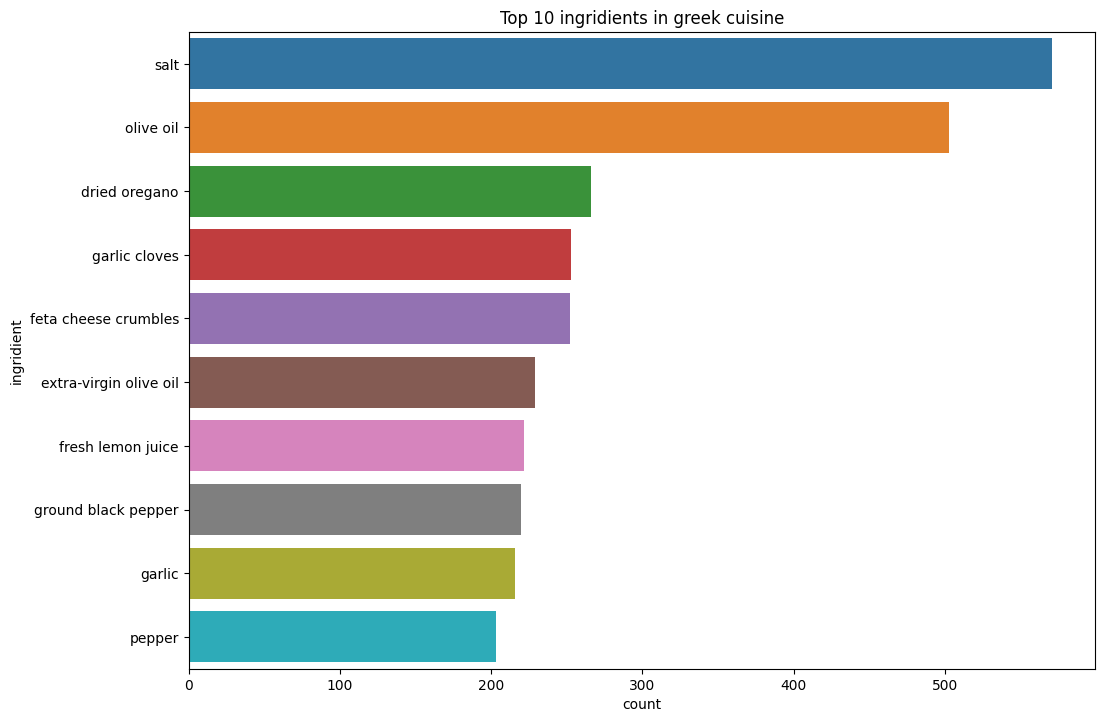

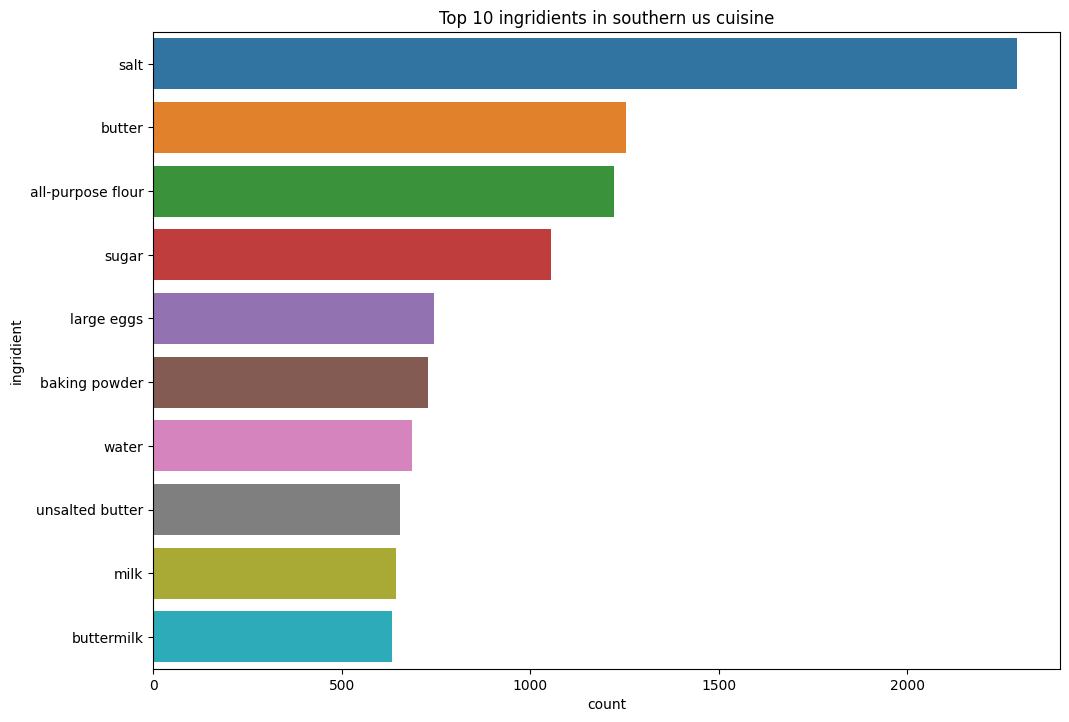

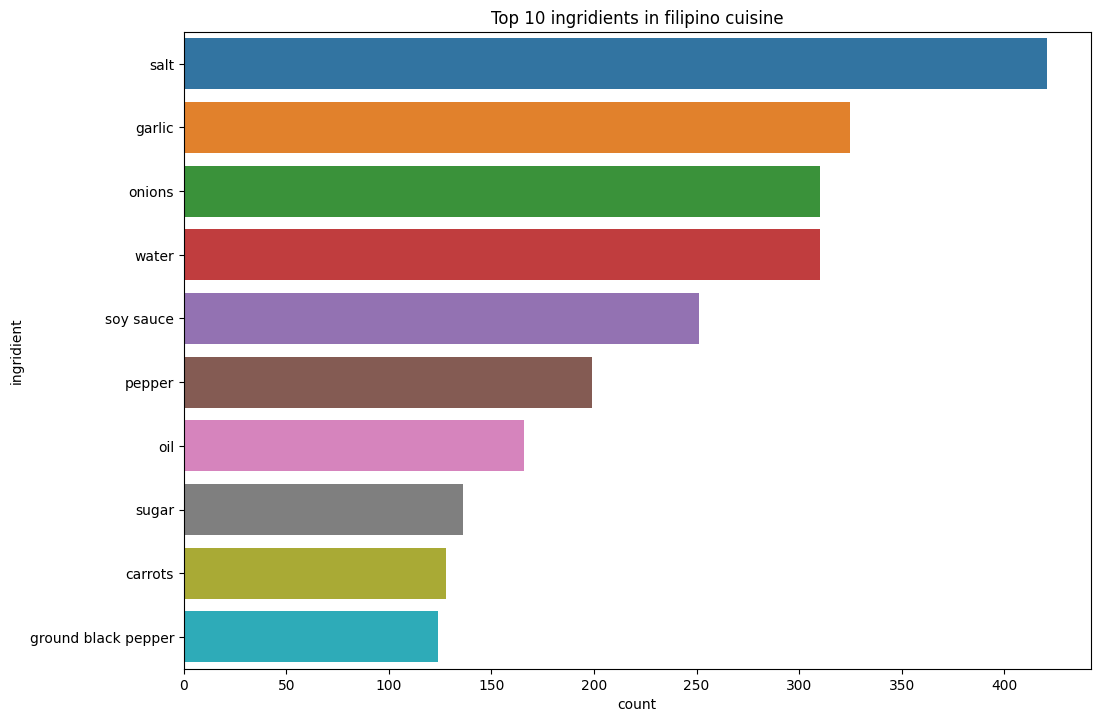

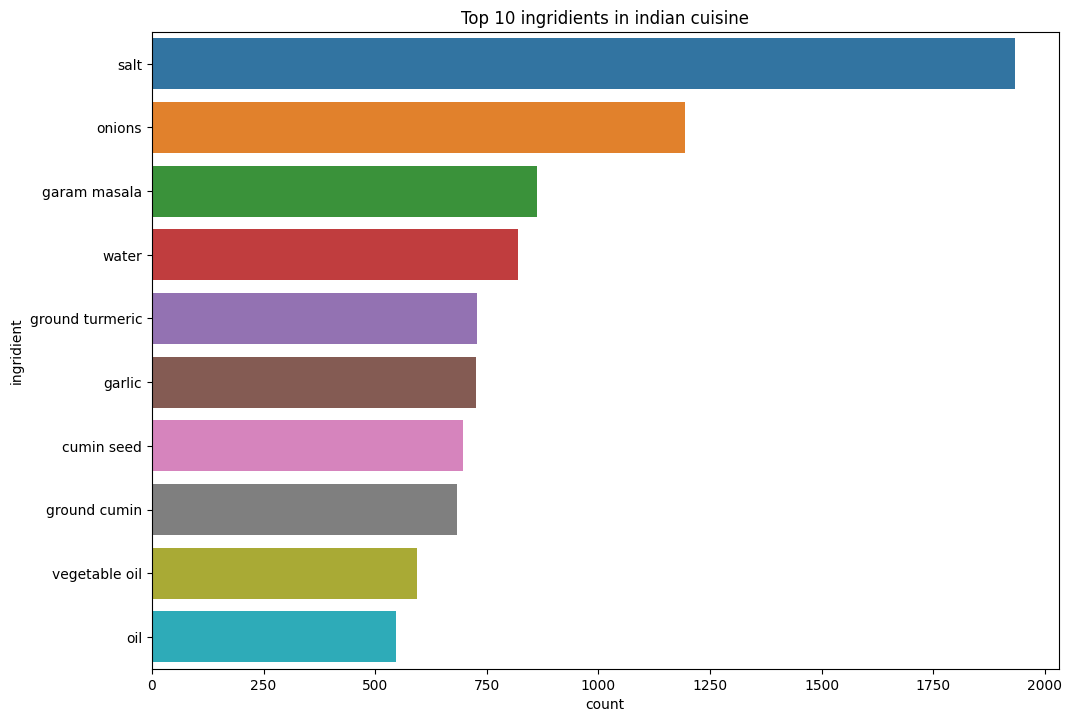

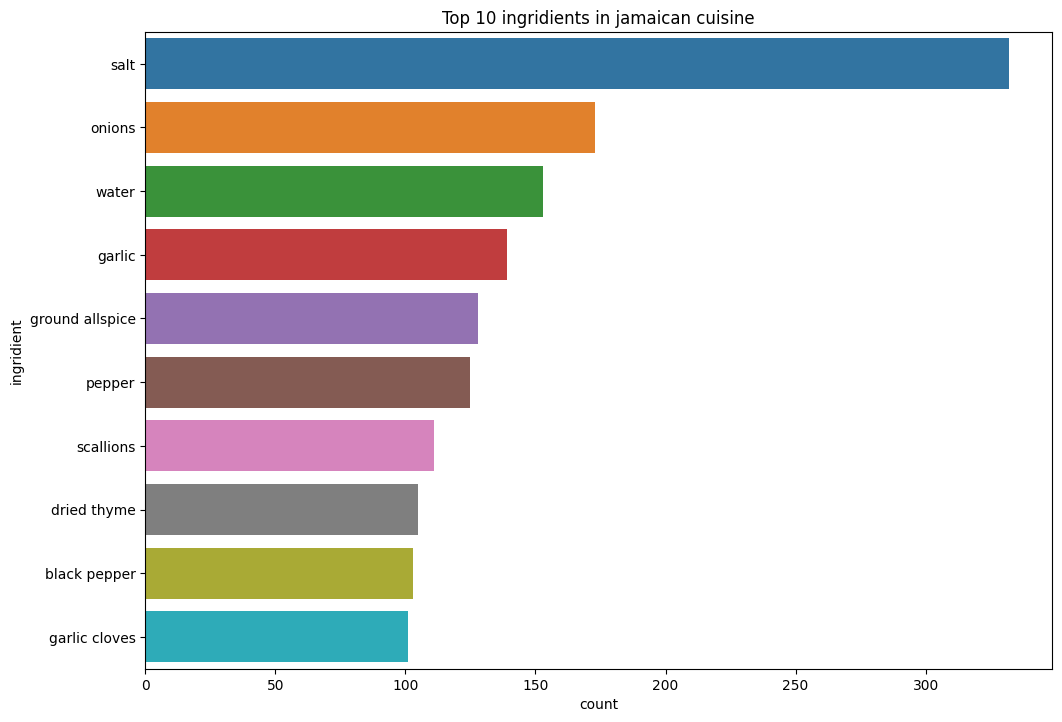

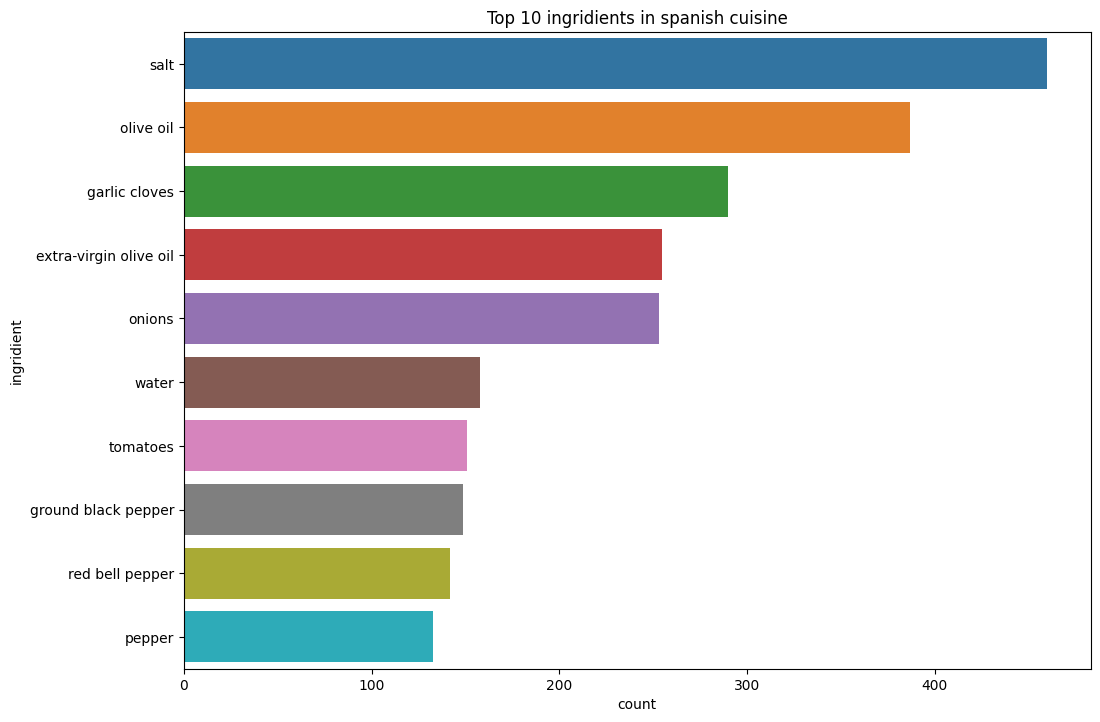

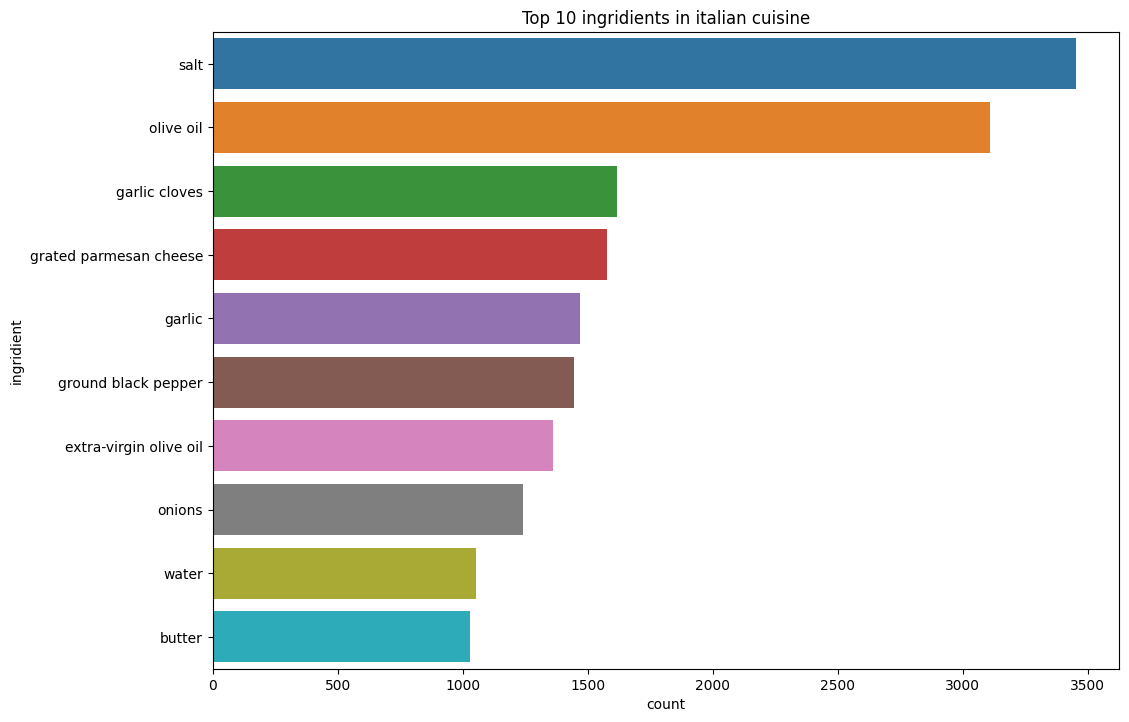

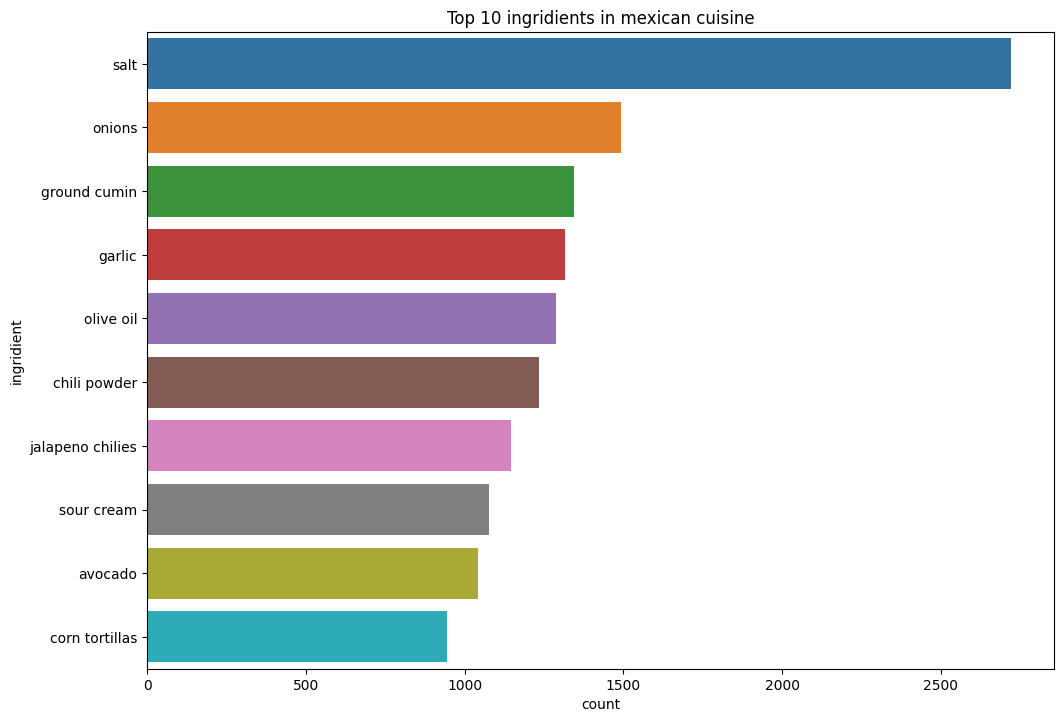

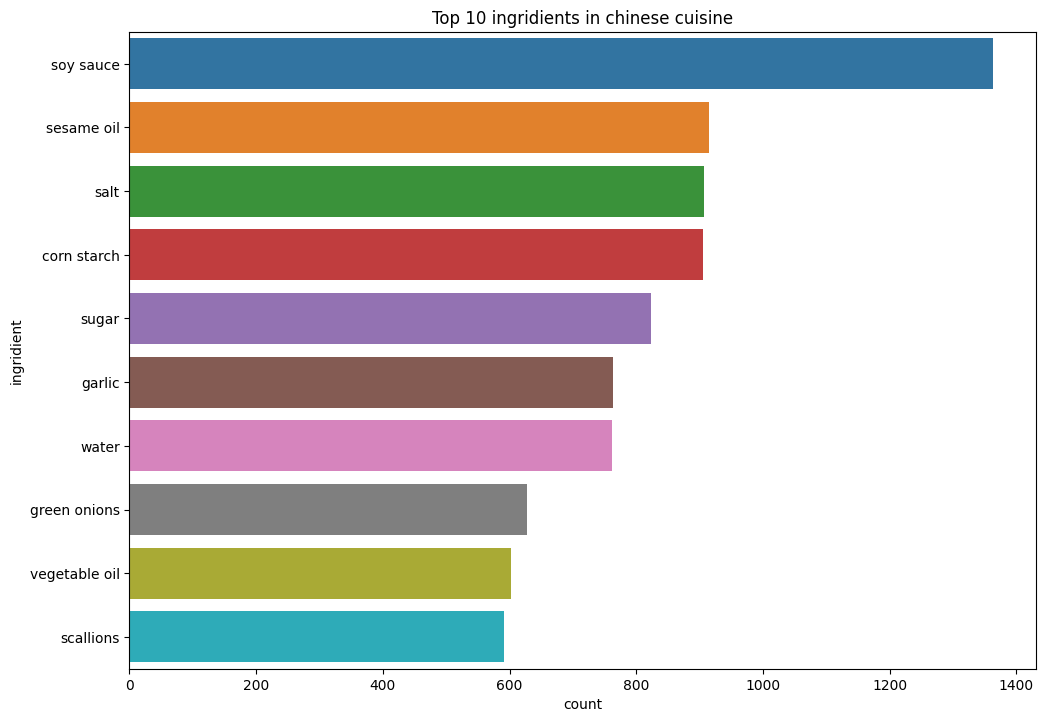

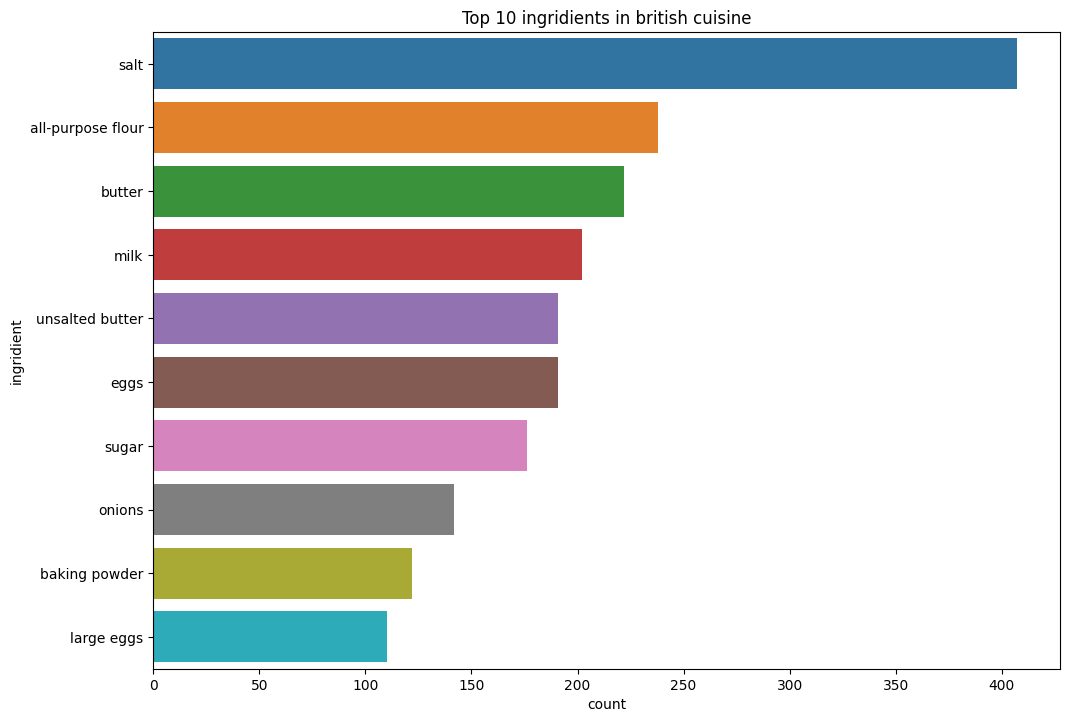

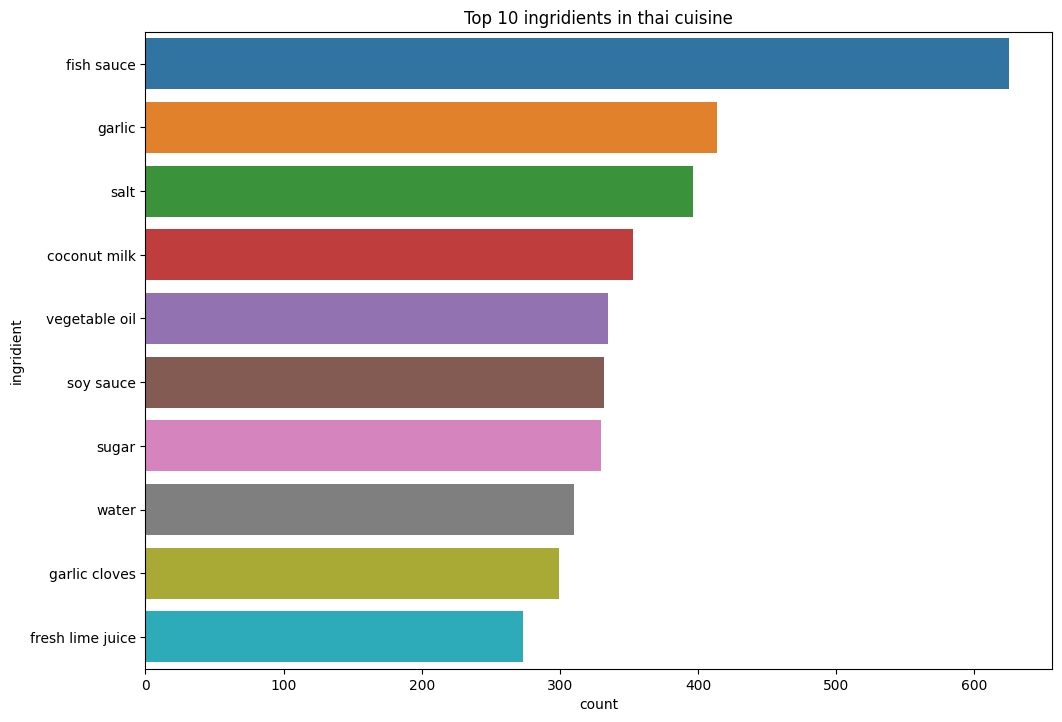

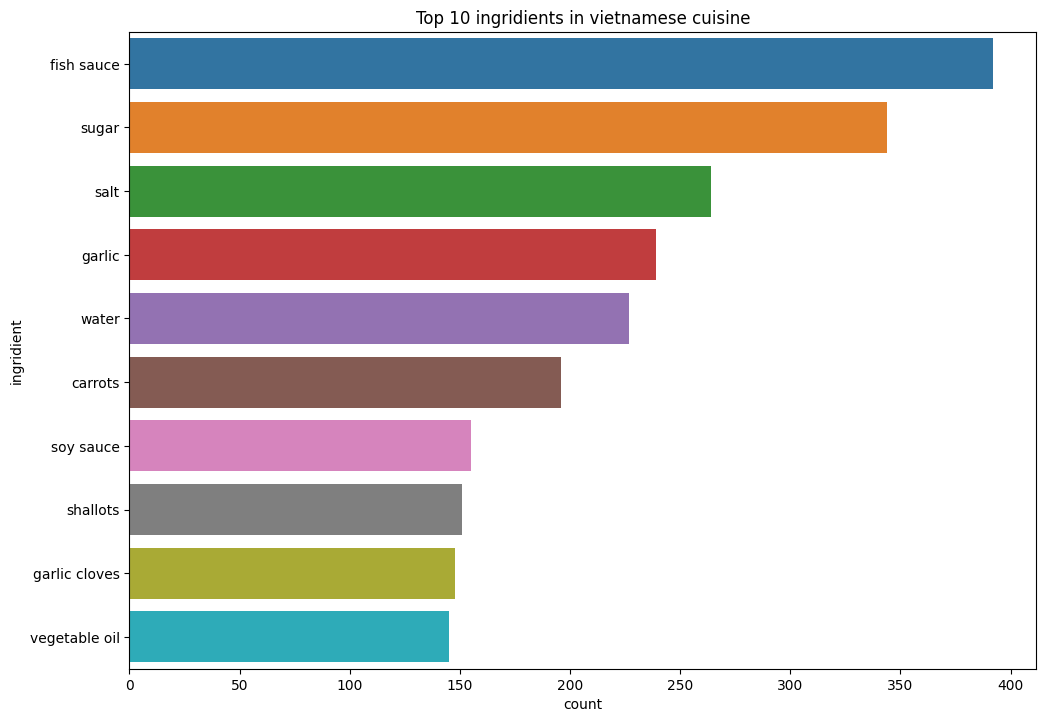

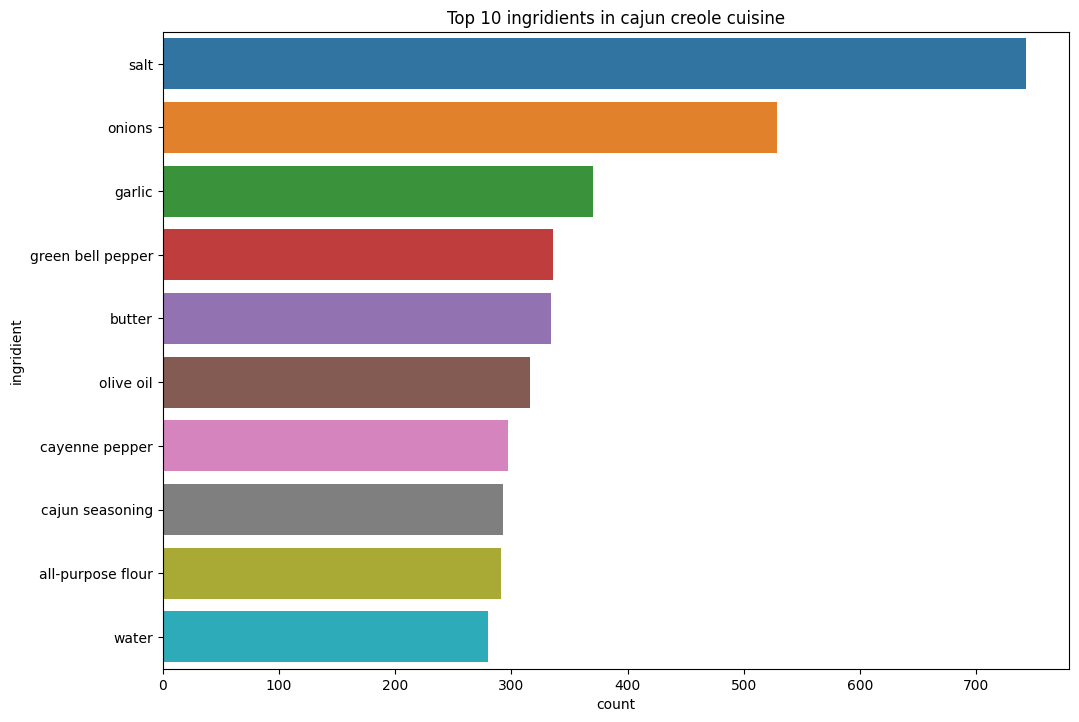

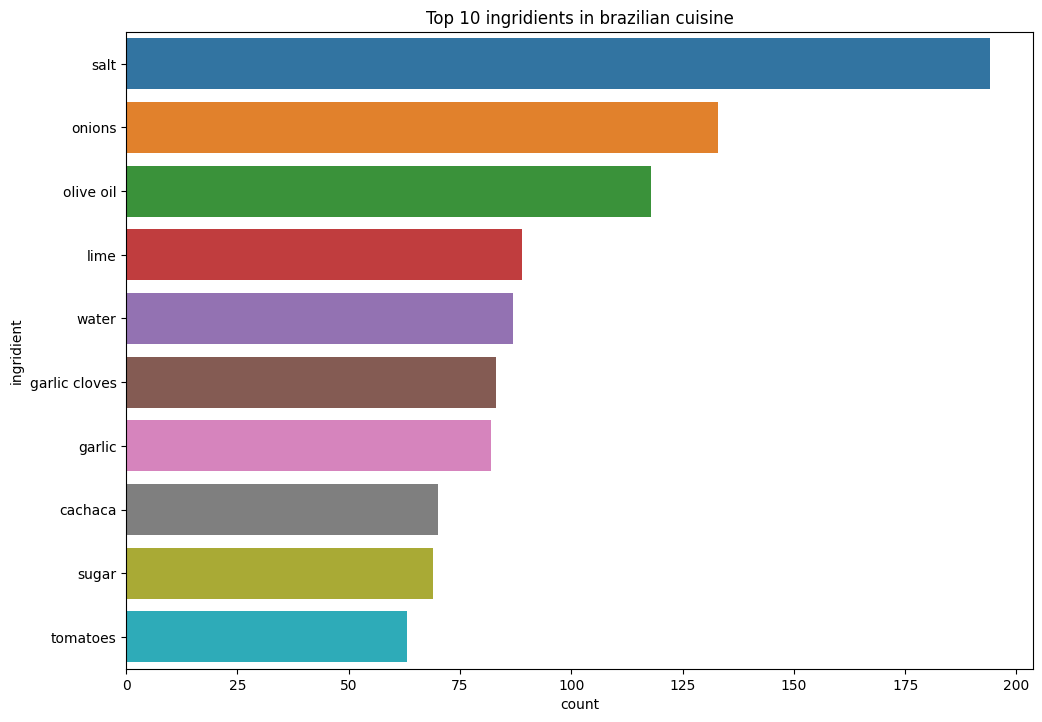

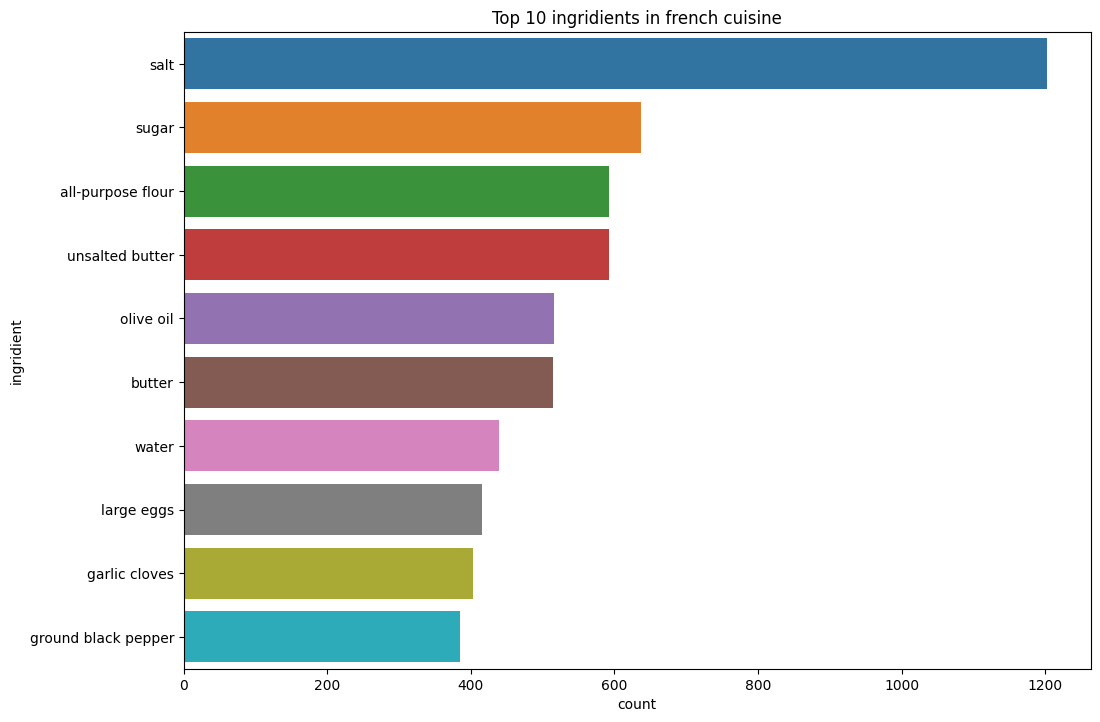

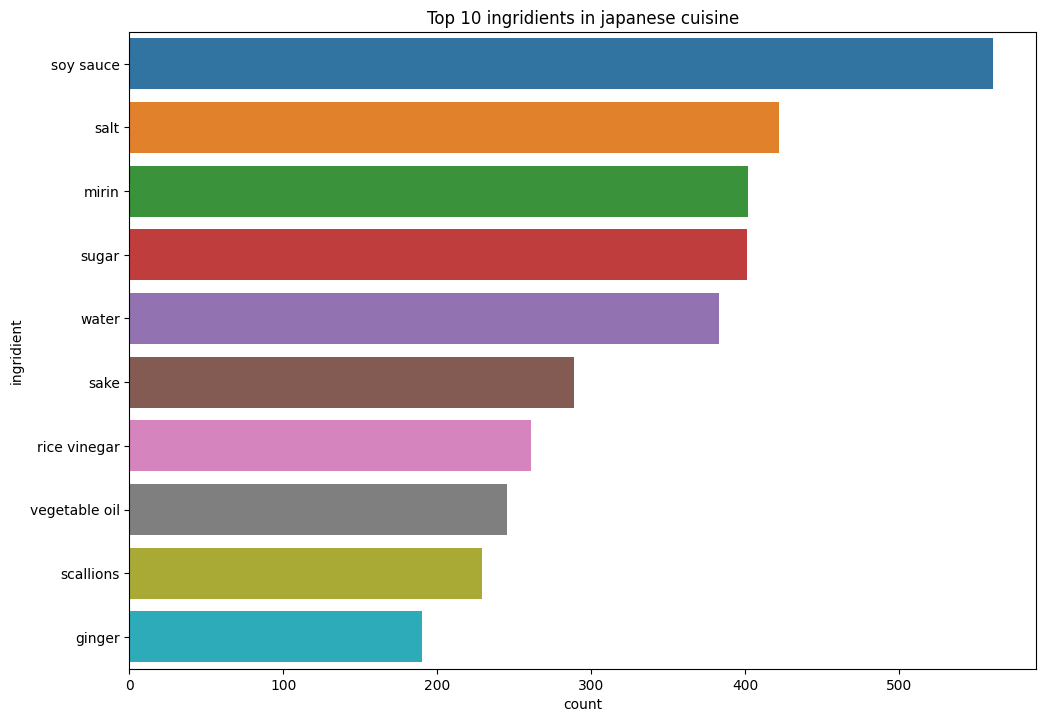

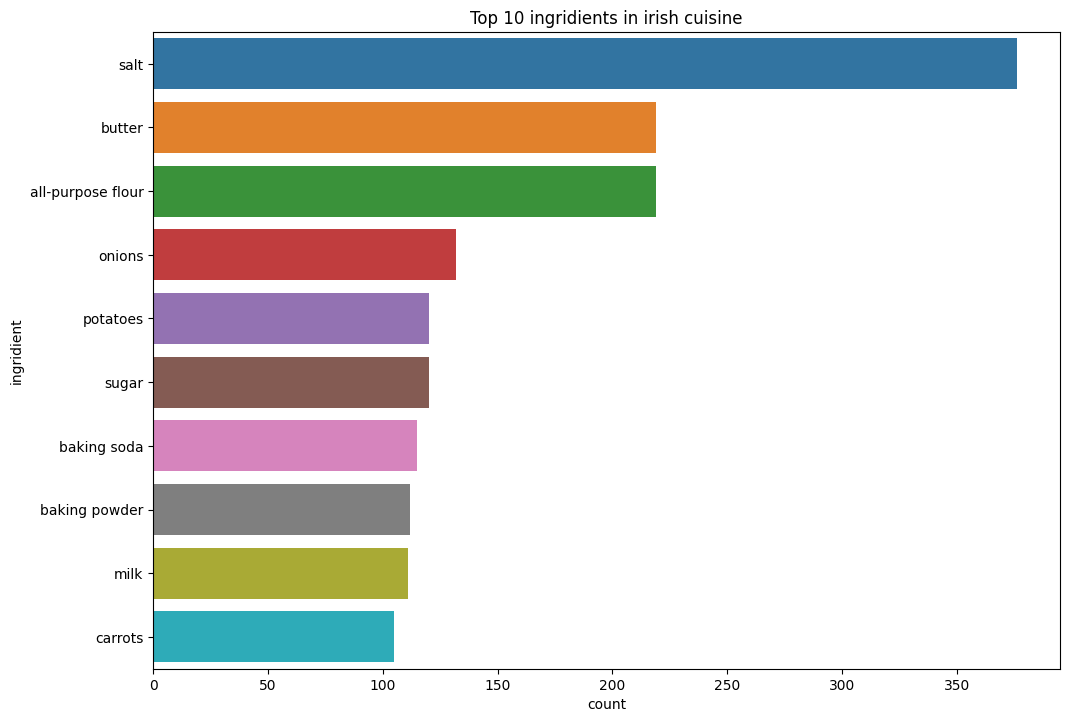

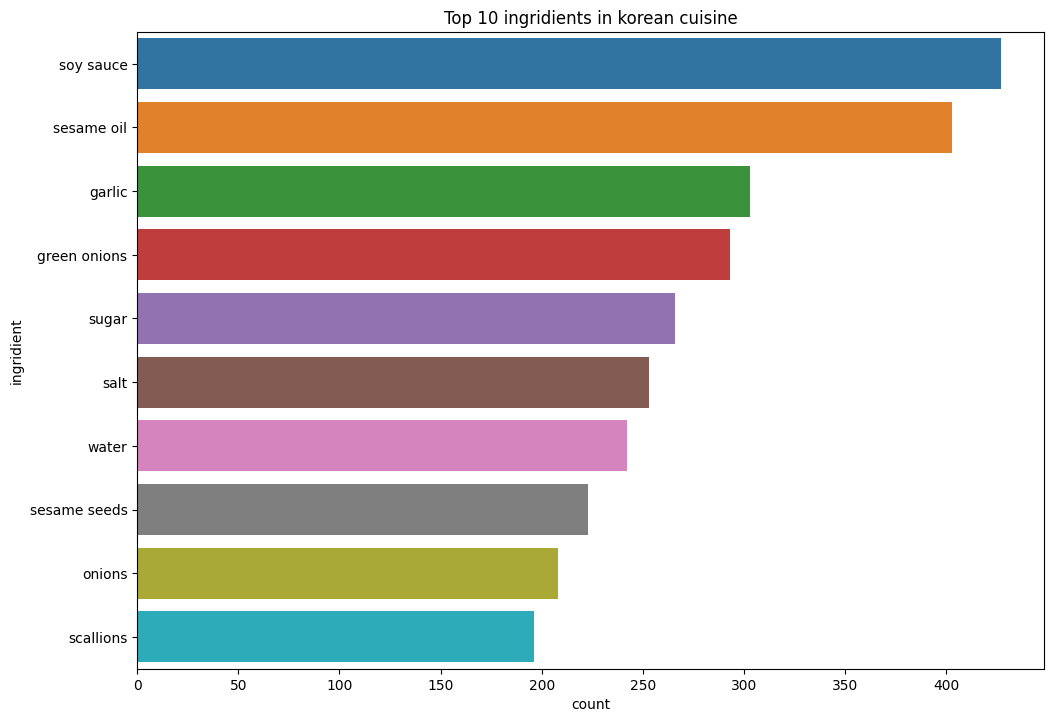

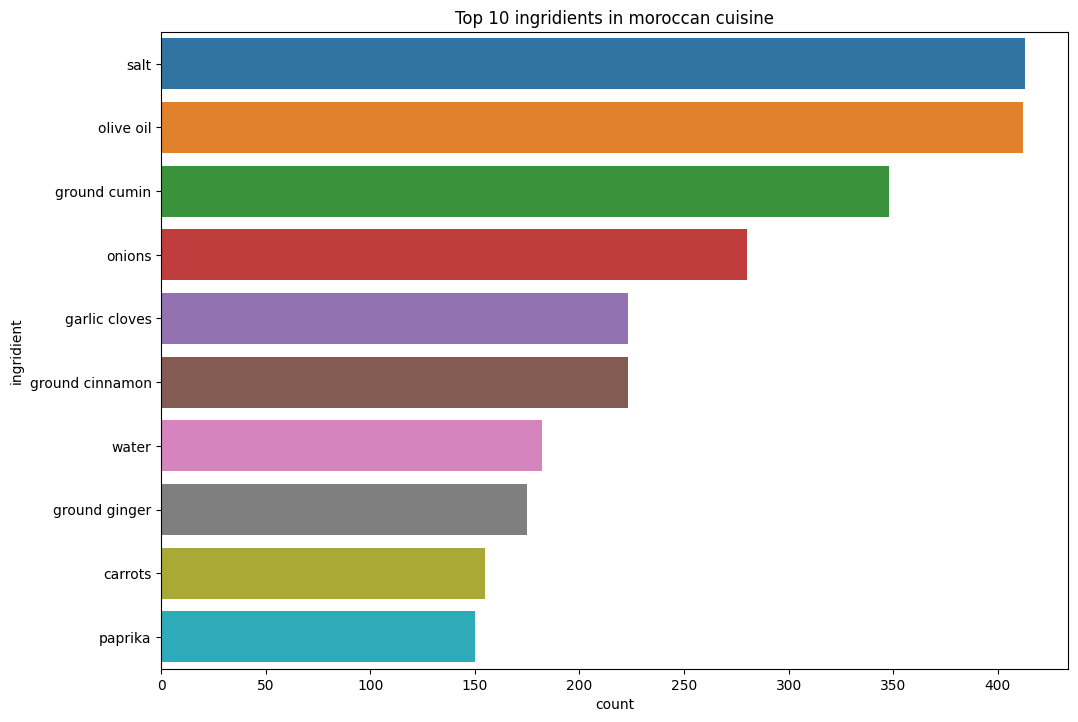

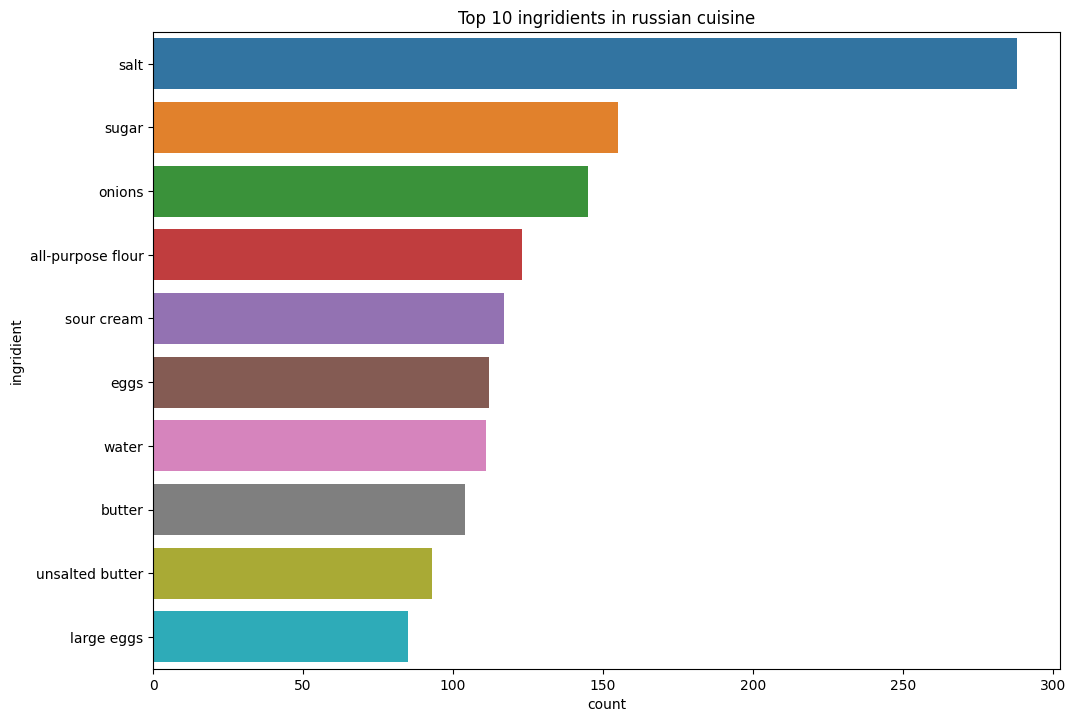

In [9]:
for cuisine_name in data['cuisine'].unique():
    tmp_df = data[data['cuisine'] == cuisine_name].drop(columns=['id', 'cuisine'])
    tmp_df = tmp_df.sum(axis=0).sort_values(ascending=False).head(10)
    tmp_df = pd.DataFrame({'ingridient': tmp_df.index, 'count': tmp_df.values})
    fig = plt.figure()
    plt.title(f'Top 10 ingridients in {cuisine_name.replace("_", " ")} cuisine')
    sns.barplot(tmp_df, x='count', y='ingridient')

Также построим график распредления количества рецептов по кухням

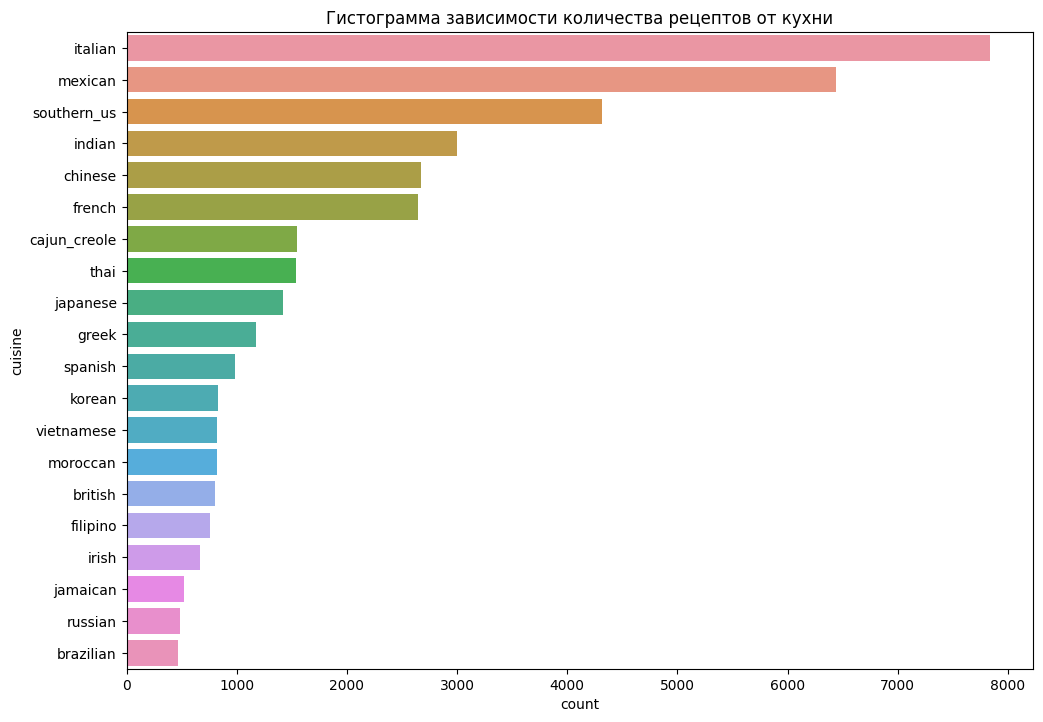

In [10]:
plt.title('Гистограмма зависимости количества рецептов от кухни')
sns.countplot(data, y='cuisine', order=data['cuisine'].value_counts().index);

# Выделение таргета и фичей

In [11]:
target = data['cuisine'].values
categorial_features = data.drop(columns=['cuisine', 'id']).values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(categorial_features, target, random_state=861, test_size=0.3)

# Логичстическая регрессия

In [22]:
# обучение модели
clf_1 = LogisticRegression(n_jobs=-1)
clf_1.fit(X_train, y_train)
accuracy_score(clf_1.predict(X_test), y_test)
joblib.dump(clf_1, "Logistic_regression.pkl")

In [13]:
# чтение модели
clf_1 = joblib.load('Logistic_regression.pkl')
accuracy_score(clf_1.predict(X_test), y_test)

0.7757479259197184

# Random forest

In [20]:
# обучение модели
from sklearn.ensemble import RandomForestClassifier
clf_2 = RandomForestClassifier(n_jobs=-1)
params = {'n_estimators': [100 * i for i in range(1, 11)], 'max_depth': [5, 10, 15, 20, 25], 'min_samples_split': [10, 20, 30, 40, 50]}
clf_2_random = RandomizedSearchCV(estimator=clf_2, scoring='accuracy', param_distributions=params)
clf_2_random.fit(X_train, y_train)
clf_2 = clf_2_random.best_estimator_
accuracy_score(clf_2.predict(X_test), y_test)
joblib.dump(clf_2, "Random_forest.pkl")

0.5421939160311741

In [14]:
# чтение модели
clf_2 = joblib.load('Random_forest.pkl')
accuracy_score(clf_2.predict(X_test), y_test)

0.5421939160311741

# Neural network

In [23]:
target = pd.factorize(data['cuisine'])[0]
categorial_features = data.drop(columns=['cuisine', 'id']).values
X_train, X_test, y_train, y_test = train_test_split(categorial_features, target, random_state=861, test_size=0.3)

In [65]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim = 6714))
model.add(Dense(20, activation='softmax'))
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [66]:
with tf.device('/gpu:0'):
    model.fit(X_train, y_train, epochs=3, batch_size=64)

Epoch 1/3
436/436 [==============================] - 4s 9ms/step - loss: 1.3859 - accuracy: 0.6449
Epoch 2/3
436/436 [==============================] - 4s 10ms/step - loss: 0.6928 - accuracy: 0.8065
Epoch 3/3
436/436 [==============================] - 5s 10ms/step - loss: 0.5194 - accuracy: 0.8521


In [67]:
predictions = model.predict(X_test).argmax(axis=1)
accuracy_score(predictions, y_test)

373/373 [==============================] - 1s 2ms/step


0.7870610910919299

In [68]:
model.save('NN_for_cuisine.keras')

In [69]:
# чтение модели
model = tf.keras.models.load_model('NN_for_cuisine.keras')
predictions = model.predict(X_test).argmax(axis=1)
accuracy_score(predictions, y_test)

373/373 [==============================] - 1s 2ms/step


0.7870610910919299

# Выводы
Были обучены три модели ML: логистическая регрессия, Random forest и полносвязная нейронная сеть. Лучший score на test выборке дала полносвязная нейронная сеть (accuracy = 0.787), после неё идет простейшая модель классификации логистическая регрессия (accuracy = 0.776), а самый худший score дал Random Forest (accuracy = 0.542).